In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
Min, Max, N = 0,20,201

x = np.linspace(Min,Max,N)
y = x.copy()

h = x[1]-x[0]
print(h)

0.1
0.1


In [3]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [5]:
T = InitT()

In [6]:
T

array([[ 0., 10., 10., ..., 10., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

array([[ 0., 10., 10., ..., 10., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
def Relajacion(T,Nit = int(1e3), omega = 1.6 ,tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] - h**2*np.exp(-x[i]*y[j]))
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    

        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

In [8]:
T = InitT()
Tf1,_ =  Relajacion(T)

 23%|█████████████████▊                                                             | 226/1000 [00:29<01:40,  7.67it/s]

226


 23%|█████████████████▊                                                             | 226/1000 [00:29<01:40,  7.67it/s]


226


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


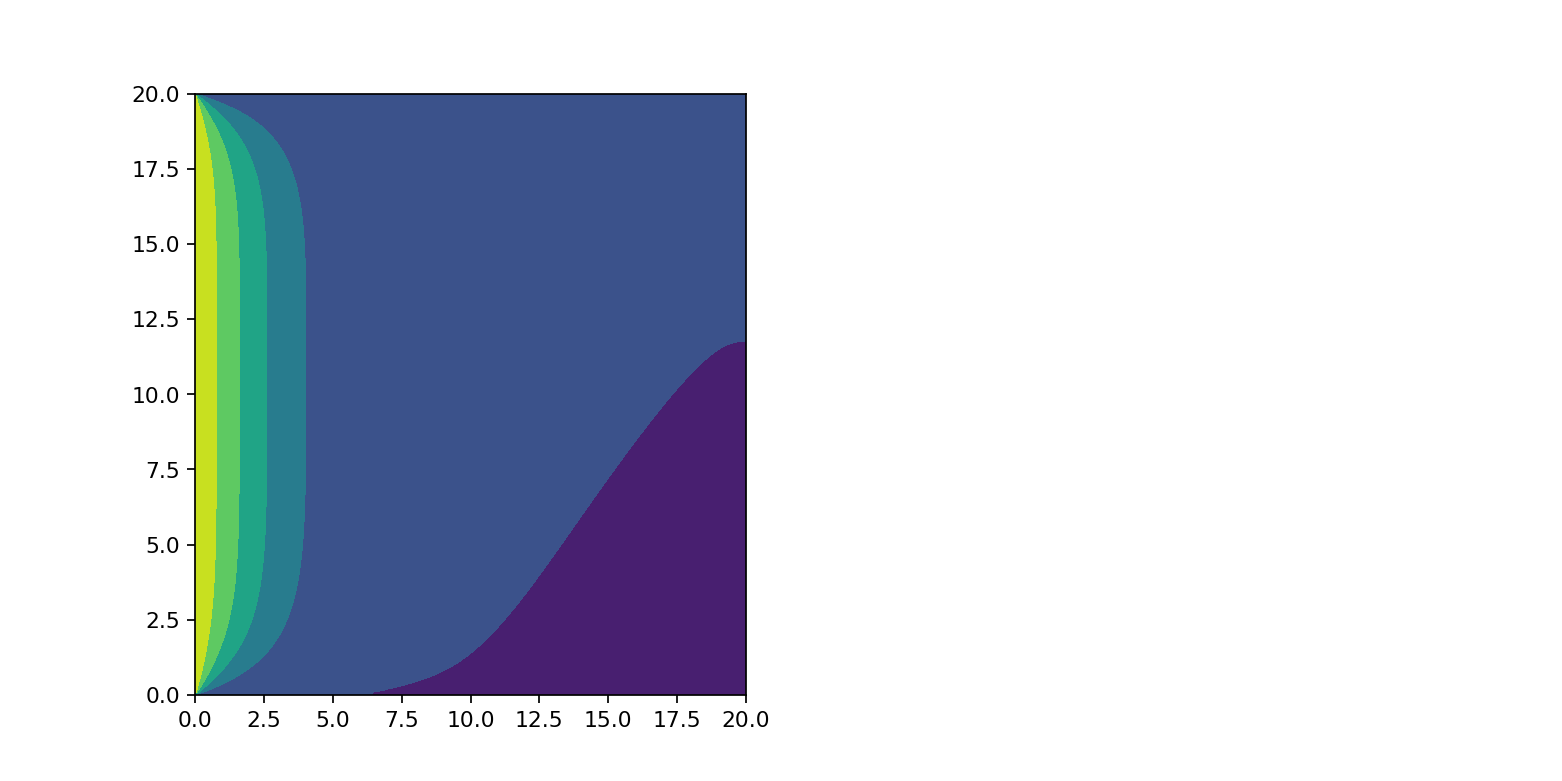

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1.T,5)

ax1.plot_surface(X,Y,Tf1.T)

plt.show()

In [16]:
u,v = np.gradient(Tf1)
u = -u
v = -v

In [18]:
plt.streamplot(x,y,u,v,color='b',density=1)
